<a href="https://colab.research.google.com/github/Jatin-Miglani/Learn-ML/blob/main/Research_ML_Day6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Practical Implementation of Encoding, Scaling and Outliers.
#Feature Scaling.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Importing the dataset

In [ ]:
sns.get_dataset_names()   #you will get lists of all libraries it contain

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
data=sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
data['pclass'].unique()  #you will get all values here

array([3, 1, 2])

In [ ]:
#sibsp is num of siblings and spouse travelling with passenger.

In [ ]:
data['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
data['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [ ]:
#Feature Scaling 3 types
#standard, min max and robust scaler

In [ ]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#we can scale age, fare.
data = data[['age','fare','sex','embark_town','class']]
data.head()

,age,fare,sex,embark_town,class
0,22.0,7.2500,male,Southampton,Third
1,38.0,71.2833,female,Cherbourg,First
2,26.0,7.9250,female,Southampton,Third
3,35.0,53.1000,female,Southampton,First
4,35.0,8.0500,male,Southampton,Third


In [ ]:
#for scaling and encoding there should'nt be any missing values in the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          714 non-null    float64 
 1   fare         891 non-null    float64 
 2   sex          891 non-null    object  
 3   embark_town  889 non-null    object  
 4   class        891 non-null    category
dtypes: category(1), float64(2), object(2)
memory usage: 29.0+ KB


In [ ]:
mean_age=np.round(data['age'].mean(),2)

In [ ]:
#age has null values.
data['age']=data['age'].fillna(mean_age)

<ipython-input-69-bfe934ac89ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age']=data['age'].fillna(mean_age)


In [ ]:
data= data.dropna()

In [ ]:
data.isnull().sum()

age            0
fare           0
sex            0
embark_town    0
class          0
dtype: int64

In [ ]:
#now no null values so we can apply scaling and encoding.


In [ ]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [ ]:
#scaling can be applied only to age and fare.


In [ ]:
x=data[['age','fare']]
x.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [ ]:
x.describe()

,age,fare
count,889.000000,889.000000
mean,29.653622,32.096681
std,12.968367,49.697504
min,0.420000,0.000000
25%,22.000000,7.895800
50%,29.700000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [ ]:
#in scaling we check mean to 0 and std to 1  std here is very far and hence to normalise we apply standard scaler

In [ ]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.59050845, -0.50023975],
       [ 0.64395742,  0.78894661],
       [-0.28189198, -0.48664993],
       ...,
       [ 0.00357825, -0.17408416],
       [-0.28189198, -0.0422126 ],
       [ 0.18103272, -0.49017322]])

In [ ]:
#now you get scaled values.
# x_scaled is array data hence converting
pd.DataFrame(x_scaled).describe()


,0,1
count,8.890000e+02,8.890000e+02
mean,-5.994455e-17,1.398706e-16
std,1.000563e+00,1.000563e+00
min,-2.255494e+00,-6.462044e-01
25%,-5.905085e-01,-4.872378e-01
50%,3.578250e-03,-3.551972e-01
75%,4.124951e-01,-2.207954e-02
max,3.884430e+00,9.668551e+00


In [ ]:
#now mean is near to zero and std near to 1.
#how accuray is affected by this? We will learn This is just an implementation of standard scaler.

In [ ]:
#MIN-MAX Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax= MinMaxScaler(feature_range=(0,1))
#it converts the values to 0-1 by default else you can give.,

In [ ]:
x_minmax_scaled=minmax.fit_transform(x)
x_minmax_scaled

array([[0.27117366, 0.01415106],
       [0.4722292 , 0.13913574],
       [0.32143755, 0.01546857],
       ...,
       [0.36793164, 0.04577135],
       [0.32143755, 0.0585561 ],
       [0.39683338, 0.01512699]])

In [ ]:
pd.DataFrame(x_minmax_scaled).describe()

,0,1
count,889.000000,889.000000
mean,0.367349,0.062649
std,0.162960,0.097003
min,0.000000,0.000000
25%,0.271174,0.015412
50%,0.367932,0.028213
75%,0.434531,0.060508
max,1.000000,1.000000


In [ ]:
#min max is used for image dataset
#Robust Scaler is not used much.
#simply imort RobustScaler from same library and hence everything same.

In [ ]:
#FEATURE ENCODING

In [ ]:
y=data[['sex','embark_town','class']]
y.head()

,sex,embark_town,class
0,male,Southampton,Third
1,female,Cherbourg,First
2,female,Southampton,Third
3,female,Southampton,First
4,male,Southampton,Third


In [ ]:
#nominal data has no rank.
#sex is a nominal data , class is ordinal and embark town is nomial data.
#for the nominal data we use One Hot Encoding.


In [ ]:
#ONE HOT ENCODING
#pandas or scikit

In [ ]:
#Using Pandas
#two dummy variables will be created as male-female
#we will create one dummy var
gender = pd.get_dummies(y['sex'], drop_first=True)  # it will drop the first column
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
embark = pd.get_dummies(y['embark_town'],drop_first=True)
embark

,Queenstown,Southampton
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [ ]:
#both 0 0 means C town
data

,age,fare,sex,embark_town,class
0,22.0,7.2500,male,Southampton,Third
1,38.0,71.2833,female,Cherbourg,First
2,26.0,7.9250,female,Southampton,Third
3,35.0,53.1000,female,Southampton,First
4,35.0,8.0500,male,Southampton,Third
...,...,...,...,...,...
886,27.0,13.0000,male,Southampton,Second
887,19.0,30.0000,female,Southampton,First
888,29.7,23.4500,female,Southampton,Third
889,26.0,30.0000,male,Cherbourg,First


In [ ]:
#now we have to add this to my data. I have to add gender and embark to my data
data=pd.concat([data,gender,embark],axis=1) #concatenating as columnn

In [ ]:
data.head()

,age,fare,sex,embark_town,class,male,Queenstown,Southampton
0,22.0,7.2500,male,Southampton,Third,1,0,1
1,38.0,71.2833,female,Cherbourg,First,0,0,0
2,26.0,7.9250,female,Southampton,Third,0,0,1
3,35.0,53.1000,female,Southampton,First,0,0,1
4,35.0,8.0500,male,Southampton,Third,1,0,1


In [ ]:
#Using Scikit Learn

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()


In [ ]:
gender = ohe.fit_transform(y[['sex']]) #here we have to pass data is two square brackets.

In [ ]:
gender.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [ ]:
#you can conert data and hence concatrenate.
gender=pd.DataFrame(gender.toarray())
gender=gender.drop([0],axis=1)
gender

,1
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
884,1.0
885,0.0
886,0.0
887,1.0


In [ ]:
#here the number of steps are more first converting to array then dropping original and hence printing.

In [ ]:
#Label Encoding for the Ordinal data
#according to the rank you have to provide the number.

In [ ]:
data['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [ ]:
#hinghest rank in class is First hence it should be given largest number.
#3 value to First and the 2 for Second and 1 for First.

#here we use a map func

data['class_new']=data['class'].map({"First":3,"Second":2,"Third":1})
data.head()

,age,fare,sex,embark_town,class,male,Queenstown,Southampton,class_new
0,22.0,7.2500,male,Southampton,Third,1,0,1,1
1,38.0,71.2833,female,Cherbourg,First,0,0,0,3
2,26.0,7.9250,female,Southampton,Third,0,0,1,1
3,35.0,53.1000,female,Southampton,First,0,0,1,3
4,35.0,8.0500,male,Southampton,Third,1,0,1,1


In [ ]:
#if you are using scikit learn for lbel encoding then First =0, second=1, third=2 i.e it assing order alphabetically.
#But most cases we use map function.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['class_label']= le.fit_transform(data['class'])
data.head()

,age,fare,sex,embark_town,class,male,Queenstown,Southampton,class_new,class_label
0,22.0,7.2500,male,Southampton,Third,1,0,1,1,2
1,38.0,71.2833,female,Cherbourg,First,0,0,0,3,0
2,26.0,7.9250,female,Southampton,Third,0,0,1,1,2
3,35.0,53.1000,female,Southampton,First,0,0,1,3,0
4,35.0,8.0500,male,Southampton,Third,1,0,1,1,2


In [ ]:
#Above it has done in alphabetical order.

In [ ]:
#Encoding is done beacuse we can't apply mathematical operation to string data.
#Scaling is done to do normalization in data. It helps in accuracy.

In [ ]:
###OUTLIERS.

In [ ]:
data= [11,12,13,14,11,10,19,20,21,22,102,11,12,13,14,11,10,19,20,21,22,11,15,14,13,15,17,18,11,10,9,12,11,15,14,13,15,17,18,11,10,9,12,11,12,13,150,14,11,10,19,20,21,22,11,15,14,13,15,17,190,18,11,10,9,12]
#Techniques for Outliers
#Using Scatter Plot
#Using Box Plot
#Using Inter Quantile Range
#Using Z score.

In [ ]:
range(len(data))

range(0, 66)

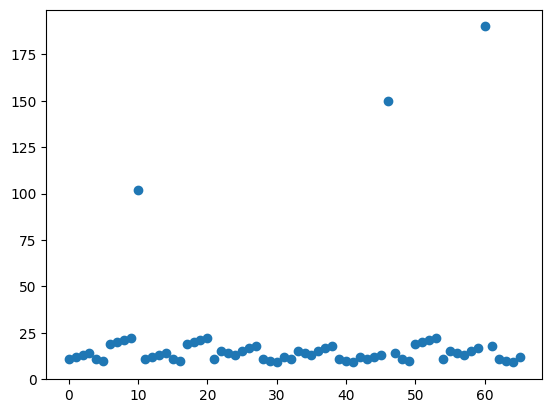

In [ ]:
#Scatter Plot
plt.scatter(x=range(len(data)),y=data,)
plt.show()

In [ ]:
#We can see the outliers present in top of graph.
#NOW BOX PLOT


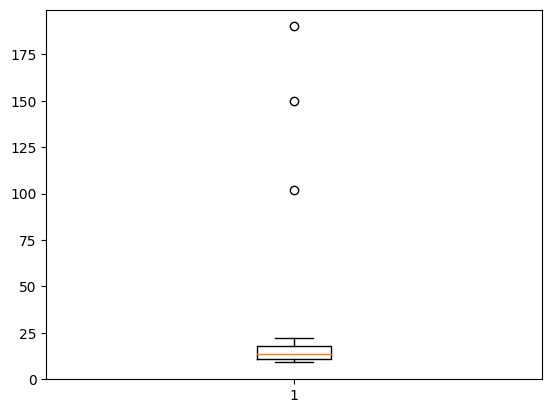

In [ ]:
plt.boxplot(x=data)
plt.show()

In [ ]:
#bottom black line represent lower value then 25% then 50% then75% and at last top value.

#Clearly 3 points are outliers

In [ ]:
#Using Z-Score
#Z=X-(X_mean)/std

In [ ]:
outliers = []
def detect_outliers(x):   #we created a function and taking var x as an arguement
  threshold=3   #threshold value of z is 3 we have to take
  mean=np.mean(x)
  std=np.std(x)
  for i in x:
    z_score=(i-mean)/std
    if np.abs(z_score) > threshold:
      outliers.append(i)
  return outliers

In [ ]:
my_outlier = detect_outliers(data)
my_outlier

[150, 190]

In [ ]:
### USING IQR- INter quantile range

In [ ]:
#data should be sorted.
data = sorted(data)
data

[9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 17,
 17,
 17,
 18,
 18,
 18,
 19,
 19,
 19,
 20,
 20,
 20,
 21,
 21,
 21,
 22,
 22,
 22,
 102,
 150,
 190]

In [ ]:
#thenw e have  to calculate q1 and q3

In [ ]:
q1,q3=np.percentile(data,[25,75]) #for 25% and 75%

In [ ]:
q1

11.0

In [ ]:
q3

18.0

In [ ]:
iqr=q3-q1
iqr

7.0

In [ ]:
#Find the lower and upper bound value
lower_bound_value = q1 -(1.5 * iqr)
upper_bound_value = q3 +(1.5 * iqr)
print(lower_bound_value,upper_bound_value)

0.5 28.5


In [ ]:
df=pd.DataFrame(data)
df=df.rename(columns={0:"samples"})

In [ ]:
df.head()


,samples
0,9
1,9
2,9
3,10
4,10


In [ ]:
#First of all give the column some good name.
#That is given above.

In [ ]:
df[df['samples']<lower_bound_value]

,samples


In [ ]:
df[df['samples']>upper_bound_value]


,samples
63,102
64,150
65,190


In [ ]:
#hence we got the outliers.

In [ ]:
#my_outlier = detect_outliers(data['age'])
#my_outlier
#you can do this to get outierws in any data.